# <font color='#eb3483'> Predicting the Stock Market </font>

The time has come to finally start monetizing your data science skills - let's try to predict the stock market! Before you get too excited, predicting the stock market is an insanely hard task (it's also why banks pay big bucks for good data scientists). Your goal for this homework exercise is to predict the market close price for a stock of your choice. Try using both the simple time series methods we started with (extracting trend, seasonality...etc.), and then try your hand at using prophet. How does each model do? Compare the performance using an evaluation method we discussed in class.

### <font color='#eb3483'> Retrieving Stock Data </font>
Fun fact - pandas was actually created for financial modelling (hence all the nifty time series functionality). A cool by-product of this is that it has some great tools for obtaining financial data. For this homework assignment, we'll use the `pandas_datareader` package to grab stock price data. You can install it us `conda install pandas-datareader`. Here's some sample code to grab google's stock data for the past 4 years - feel free to grab whatever data you want to model.

In [67]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2010', end='2021',
                       data_source='yahoo')
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800.0,1738.849976
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000.0,1776.089966
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400.0,1758.719971
2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100.0,1739.520020
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900.0,1751.880005


### <font color='#eb3483'> Your Turn </font>

In [68]:
goog = goog.reset_index()[['Date', 'Close']]
#goog.head()

,Date,Close
0,2010-01-04,312.204773
1,2010-01-05,310.829926
2,2010-01-06,302.994293
3,2010-01-07,295.940735
4,2010-01-08,299.885956


In [39]:
goog.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

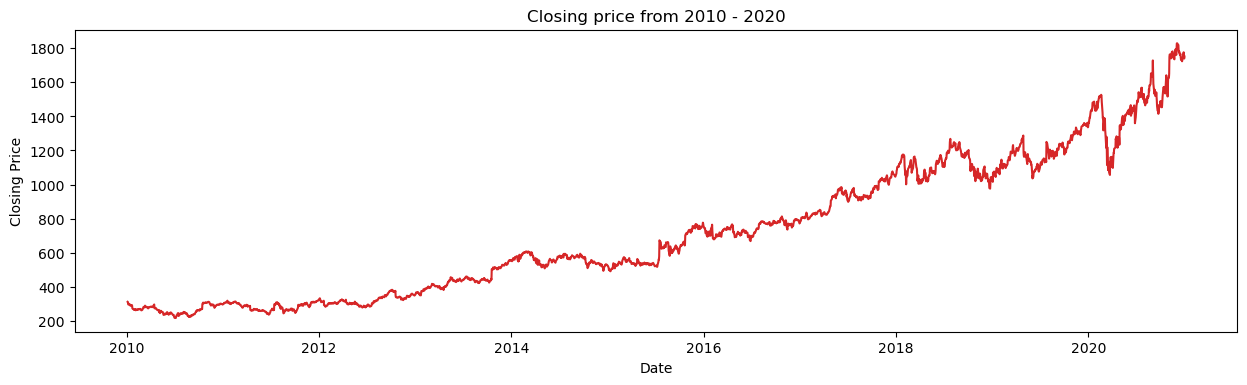

In [63]:
#Visualize the Time Series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Closing Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(goog, x=goog['Date'], y=goog['Close'], title='Closing price from 2010 - 2020')

In [64]:
#goog

,Date,Close
0,2010-01-04,312.204773
1,2010-01-05,310.829926
2,2010-01-06,302.994293
3,2010-01-07,295.940735
4,2010-01-08,299.885956
...,...,...
2764,2020-12-24,1738.849976
2765,2020-12-28,1776.089966
2766,2020-12-29,1758.719971
2767,2020-12-30,1739.520020


In [69]:
goog = goog.set_index("Date").resample('3M').mean()
#goog.head()

,Close
Date,
2010-01-31,288.220202
2010-04-30,274.882134
2010-07-31,241.454731
2010-10-31,257.043023
2011-01-31,300.188471


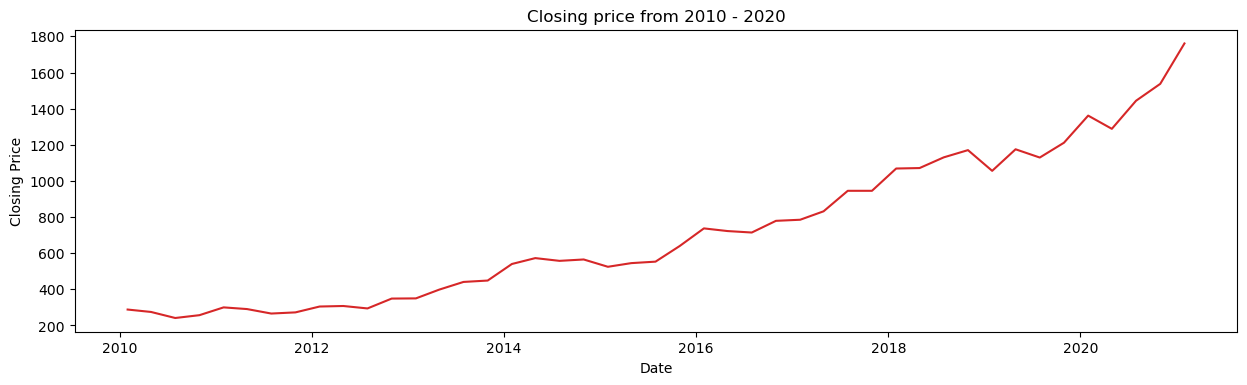

In [70]:
plot_df(goog, x=goog.index, y=goog['Close'], title='Closing price from 2010 - 2020')

<AxesSubplot:xlabel='Date'>

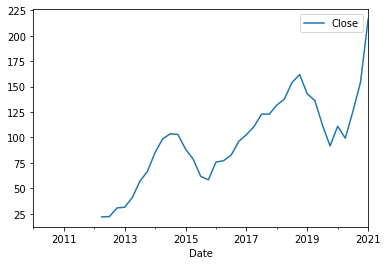

In [72]:
goog.rolling(10).std().plot()

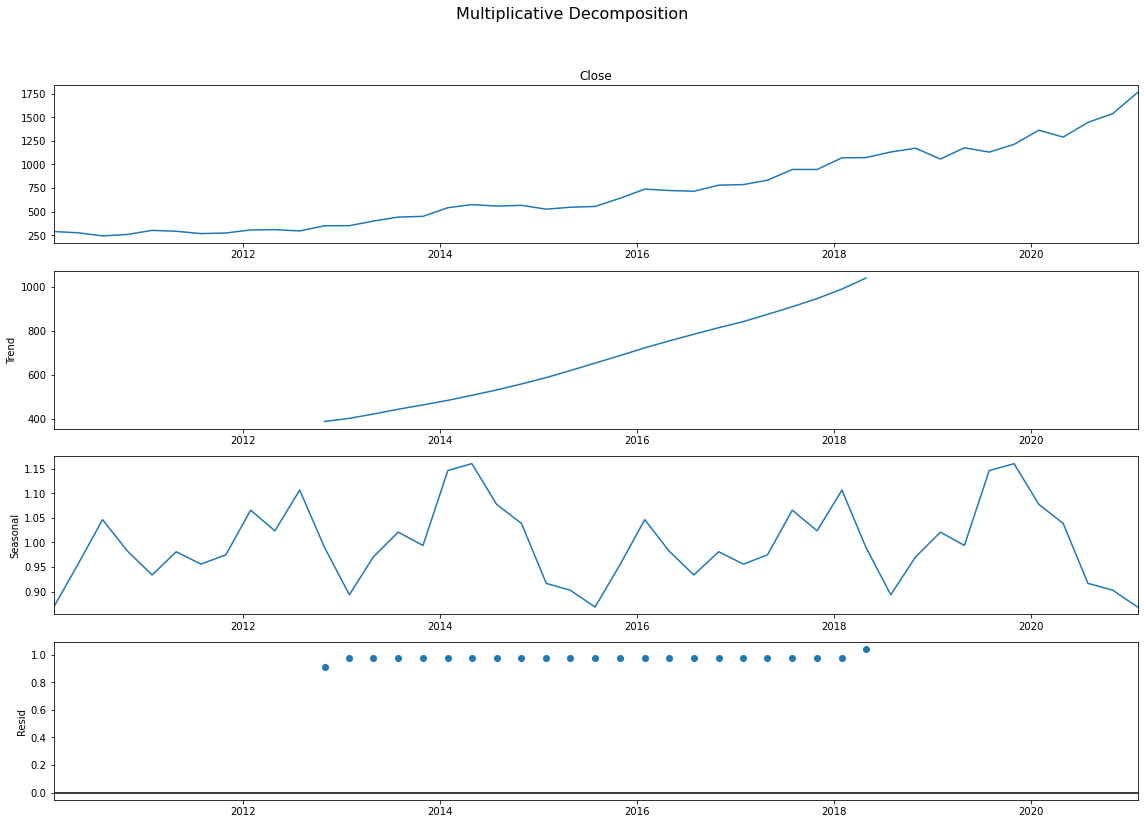

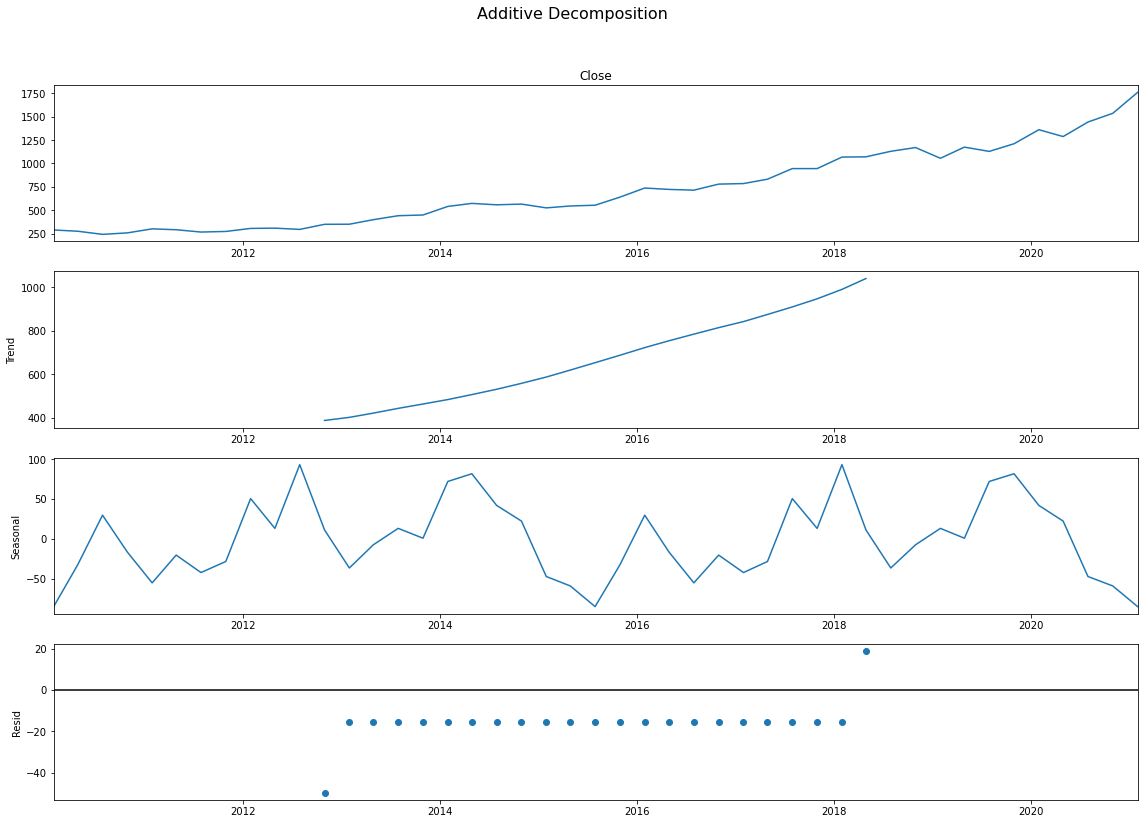

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(goog['Close'], model='multiplicative', period=22)

# Additive Decomposition
additive_decomposition = seasonal_decompose(goog['Close'], model='additive', period=22)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Closing price detrended by subtracting the least squares fit')

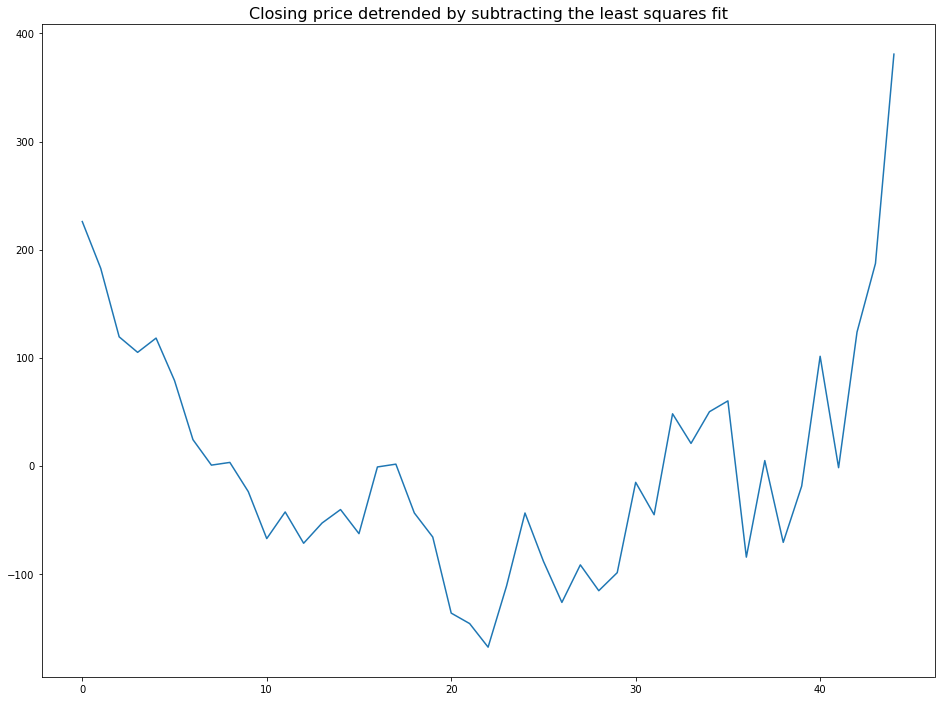

In [78]:
# # Using scipy: Subtract the line of best fit
# from scipy import signal
# detrended = signal.detrend(goog['Close'].values)
# plt.plot(detrended)
# plt.title('Closing price detrended by subtracting the least squares fit', fontsize=16)